In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ingredient DF

In [41]:
intdf = pd.read_csv(r"C:\Users\kevin\Downloads\mai-shen-yun-main\MSY Data - Ingredient.csv", sep=None, engine='python')
intdf = df.fillna(0)
print(intdf.shape)
print(intdf.columns.tolist())
intdf

(17, 19)
['Item name', 'braised beef used (g)', 'Braised Chicken(g)', 'Braised Pork(g)', 'Egg(count)', 'Rice(g)', 'Ramen (count)', 'Rice Noodles(g)', 'chicken thigh (pcs)', 'Chicken Wings (pcs)', 'flour (g)', 'Pickle Cabbage', 'Green Onion', 'Cilantro', 'White onion', 'Peas(g)', 'Carrot(g)', 'Boychoy(g)', 'Tapioca Starch']


,Item name,braised beef used (g),Braised Chicken(g),Braised Pork(g),Egg(count),Rice(g),Ramen (count),Rice Noodles(g),chicken thigh (pcs),Chicken Wings (pcs),flour (g),Pickle Cabbage,Green Onion,Cilantro,White onion,Peas(g),Carrot(g),Boychoy(g),Tapioca Starch
0,Beef Tossed Ramen,140.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,50.0,20.0,20.0,0.0,0.0,0.0,50.0,0.0
1,Beef Ramen,140.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0
2,Beef Fried Rice,100.0,0.0,0.0,1.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,10.0,10.0,0.0,0.0
3,Pork Fried Rice,0.0,0.0,100.0,1.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,10.0,10.0,0.0,0.0
4,Chicken Fried Rice,0.0,100.0,0.0,1.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,10.0,10.0,0.0,0.0
5,Fried Wings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Pork Tossed Ramen,0.0,0.0,140.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,50.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0
7,Pork Ramen,0.0,0.0,140.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,50.0,0.0
8,Chicken Tossed Ramen,0.0,140.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,50.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0
9,Chicken Ramen,0.0,140.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,50.0,0.0


In [42]:
long_df = intdf.melt(
    id_vars=['Item name'],
    var_name='Ingredient',
    value_name='Quantity'
)

# Drop zero or null quantities
long_df = long_df[long_df['Quantity'] > 0]

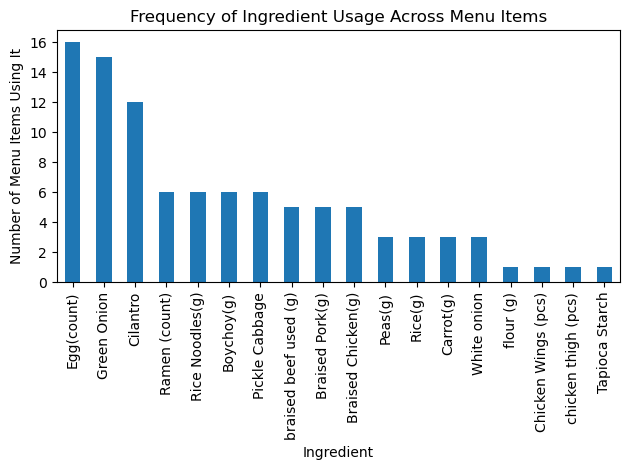

In [43]:
# Ingredient Usage Freq
ingredientCount = long_df['Ingredient'].value_counts()
plt.plot(figsize=(10,10))
ingredientCount.plot(kind='bar')
plt.title("Frequency of Ingredient Usage Across Menu Items")
plt.xlabel("Ingredient")
plt.ylabel("Number of Menu Items Using It")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

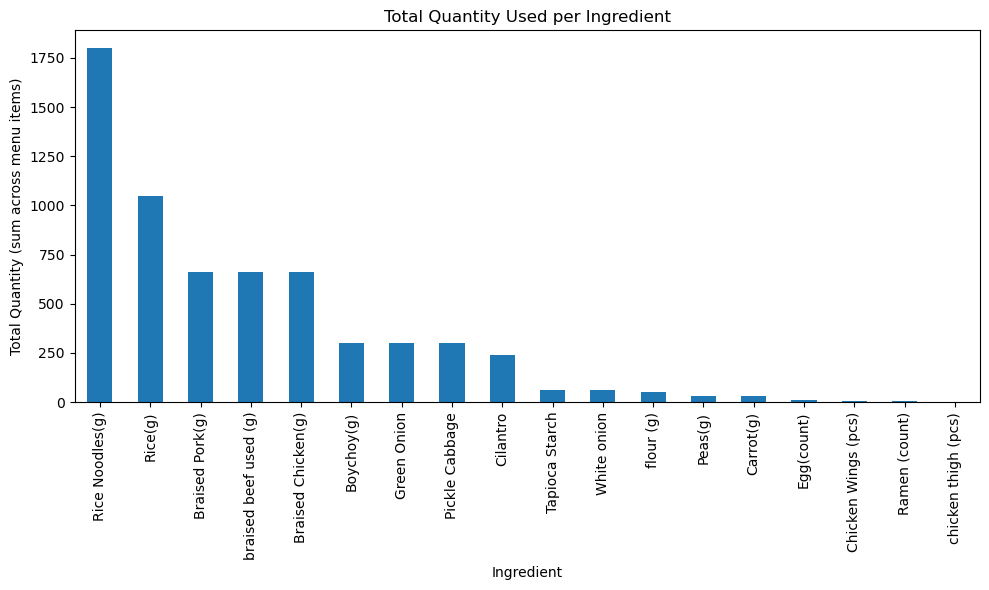

In [44]:
ingredient_totals = long_df.groupby('Ingredient')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ingredient_totals.plot(kind='bar')
plt.title("Total Quantity Used per Ingredient")
plt.xlabel("Ingredient")
plt.ylabel("Total Quantity (sum across menu items)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# October Matrix DF

In [45]:
octDF = pd.read_excel(r"C:\Users\kevin\Downloads\mai-shen-yun-main\October_Data_Matrix_20251103_214000.xlsx")

In [46]:
# Clean up dollar signs and commas in Amount
octDF['Amount'] = octDF['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Clean up commas in Count before converting to int
octDF['Count'] = octDF['Count'].replace(',', '', regex=True).astype(int)

octDF

,source_page,source_table,Category,Count,Amount
0,1,1,Tossed Rice Noodle,391,5971.41
1,1,1,Tossed Ramen,460,6591.08
2,1,1,Ramen,940,14097.72
3,1,1,Fried Chicken,939,10965.23
4,1,1,Fruit Tea,105,460.01
5,1,1,Fried Rice,492,6911.21
6,1,1,Additonal,198,508.54
7,1,1,Appetizer,1241,7416.47
8,1,1,Dessert,31,153.64
9,1,1,Lunch Special,366,5149.01


# Shipment DF

In [47]:
shipDF = pd.read_csv(r"C:\Users\kevin\Downloads\mai-shen-yun-main\MSY Data - Shipment.csv")

In [48]:
# Clean up column names
shipDF.columns = shipDF.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean up text and numeric columns
shipDF['ingredient'] = shipDF['ingredient'].str.strip()

# Convert quantity and shipments to numeric
shipDF['quantity_per_shipment'] = pd.to_numeric(shipDF['quantity_per_shipment'], errors='coerce')
shipDF['number_of_shipments'] = pd.to_numeric(shipDF['number_of_shipments'], errors='coerce')

# Sanity check
shipDF

,ingredient,quantity_per_shipment,unit_of_shipment,number_of_shipments,frequency
0,Beef,40,lbs,3,weekly
1,Chicken,40,lbs,2,weekly
2,Ramen,50,rolls,15,biweekly
3,Rice Noodles,50,lbs,2,monthly
4,Flour,50,lbs,2,monthly
5,Tapioca Starch,25,lbs,1,monthly
6,Rice,50,lbs,2,Biweekly
7,Green Onion,20,lbs,2,weekly
8,White Onion,80,whole onion,4,weekly
9,Cilantro,5,lbs,2,weekly


# Merge DF